<center><h1>QBUS2820 - Predictive Analytics</h1></center>

# Tutorial 4- Model Selection

## KNN model selction

### Let's start the tutotrial with the solution of the tasks last week

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline
sns.set_style("darkgrid")


In [28]:
data=pd.read_csv('credit.csv', index_col='Obs')
train = data.sample(frac=0.7, random_state=1)
test = data[data.index.isin(train.index)==False]

In [29]:
values = np.arange(1, 101)
print(values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


Generate a plot of the test performance for the model with one as we change the number of neighbours. Interpret the results and relate them to our discussion in Lectures 3 and 4. 

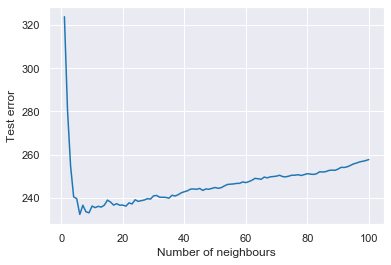

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

losses = []
for k in values:
    # 1. Specify and fit the model (there is no need to store it)
    knn = KNeighborsRegressor(n_neighbors= k) 
    knn.fit(train[['Limit']], train['Balance'])
    # 2. Compute predictions for the test data
    predictions = knn.predict(test[['Limit']]
#     should be changed to "predictions = knn.predict(validation[['Limit']])"
    # 3. Compute the root mean squared error and assign to a variable called loss
    loss = np.sqrt(mean_squared_error(test['Balance'], predictions))
#     should be change to "loss = np.sqrt(mean_squared_error(validation['Balance'], predictions))"
    losses.append(loss)
    
fig, ax= plt.subplots()
ax.plot(values, losses)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.show()

This will give you the value of $k$ with lowest test error. Why"+1"?

In [31]:
1 + np.argmin(losses)

6

## Model selection
**We should refer to *validation error* to choose model rather than rely on test error. Test set is just for testing the final selected model.**

### Can you produce the "Train error" and plot it vs the "Number of neighbours"? How does the plot look like? Does the plot meet your expectation?

## Train/Validation/Test split in Python

#### Train/Test split in Python. Or you may treat such split as Train/Validation dependent on your application scenario.

scikit learn also has a train_test_split function that will split the data into random train and test (validation)sets.

#### Train/Validation/Test split in Python

You could just use sklearn.model_selection.train_test_split twice. First to split to train and test, and then split train again into train and validation.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

house_prices = pd.read_excel("BatonRouge.xls")

target_y = house_prices['Price']
features_x = house_prices.loc[:, house_prices.columns != 'Price']

X_train, X_test, y_train, y_test = train_test_split(features_x, target_y, test_size=0.2, random_state=1)

In [2]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

**train_test_split:**

**1st step:**
test = 0.2
train = 0.8

**2nd step:**
train = 0.8 * 0.8
validation = 0.8 * 0.2

The number of examples for Train set

In [34]:
X_train.shape[0]

691

The number of examples for Valiation set

In [35]:
X_val.shape[0]

173

The number of examples for test set

In [36]:
X_test.shape[0]

216

## Linear regression model selection

### Example

Lets create a synthetic dataset with a training and a single validation set to see which set we should used to select our model.

The data comes from the following function

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

We will evaluate the following models

$f(x) = \beta_0 + \beta_1 x $

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

Up to

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_9 x^9 $

**So the mode with highest order polynomial should be the best model right? NO!**

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Initialise RNG, so we get same result everytime
np.random.seed(0)

# Number of training points
m = 50

x = np.linspace(0.0, 1.0, m)

# Function coefficients/parameters
beta0 = 4
beta1 = 1.5
beta2 =  3.2
 
# f values from 2nd order polynomial
f = beta0 + beta1 * x + beta2 * np.power(x,2) 

$f$ contains data perfectly sampled along the 2nd order polynomial. In the real world we usually observe data that is noisy. So we will add a small amount of Gaussian noise to the data

In [38]:
# Generate noisy sample from true function
sigma2 = 0.1
y_train = f + np.random.normal(0, np.sqrt(sigma2), m)
y_validation = f + np.random.normal(0, np.sqrt(sigma2), m)

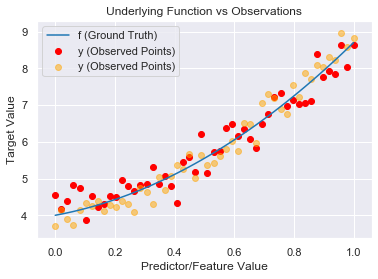

In [39]:
fig1 = plt.figure()

plt.plot(x, f, label = "f (Ground Truth)")
plt.scatter(x, y_train, label = "y (Observed Points)", color = "red")
plt.scatter(x, y_validation, label = "y (Observed Points)", color = "orange", alpha = 0.5)

plt.xlabel("Predictor/Feature Value")
plt.ylabel("Target Value")
plt.title("Underlying Function vs Observations")
plt.legend(loc="upper left")

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

max_deg = 10

train_error = list()
validation_error = list()

for i in range(1, max_deg):
    
    poly_transformer = PolynomialFeatures(i) 
    poly_x = poly_transformer.fit_transform(x.reshape(-1,1))
    
    # Create the linear regression object
    lin_reg = LinearRegression()

    # Estimate coefficients
    lin_reg.fit(poly_x, y_train)
    
    # Calculate predictions
    y_pred = lin_reg.predict(poly_x)
    
    # Calcualte MSE
    mse_train = mean_squared_error(y_train, y_pred)
    train_error.append(mse_train)
    
    mse_valid = mean_squared_error(y_validation, y_pred)
    validation_error.append(mse_valid)

### Visualise the learning curve

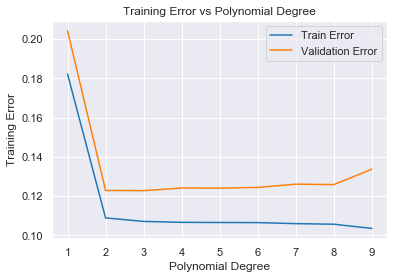

In [41]:
fig4 = plt.figure()

plt.plot(np.arange(1, 10, 1), train_error, label = "Train Error")
plt.plot(np.arange(1, 10, 1), validation_error, label = "Validation Error")

plt.title('Training Error vs Polynomial Degree')
plt.xlabel("Polynomial Degree")
plt.ylabel("Training Error")
plt.legend()

### Findings

- If we selected the best model based on training error we would use the incorrect model (polynomial order 9)
- If we selected the best model based on validation error we would have a much better model (polynomial order 2)
- **More complex models do not always give better predictive performance**

## Tasks

## Generating Synthetic Data

Lets create a synthetic dataset as below which is used above example

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Initialise RNG, so we get same result everytime
np.random.seed(0)

# Number of training points
m = 50

x = np.linspace(0.0, 1.0, m)

# Function coefficients/parameters
beta0 = 4
beta1 = 1.5
beta2 =  3.2
 
# f values from 2nd order polynomial
f = beta0 + beta1 * x + beta2 * np.power(x,2)  

f contains data perfectly sampled along the 2nd order polynomial. In the real world we usually observe data that is noisy. So we will add a small amount of Gaussian noise to the data

In [43]:
# Generate noisy sample from population
sigma2 = 0.1
y = f + np.random.normal(0, np.sqrt(sigma2), m)

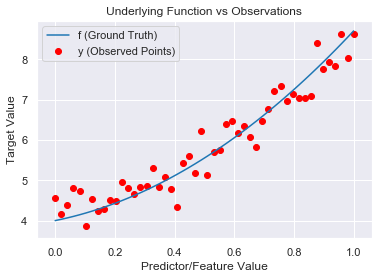

In [44]:
fig1 = plt.figure()
plt.plot(x, f, label = "f (Ground Truth)")
plt.scatter(x, y, label = "y (Observed Points)", color = "red")
plt.xlabel("Predictor/Feature Value")
plt.ylabel("Target Value")
plt.title("Underlying Function vs Observations")

plt.legend(loc="upper left")

## Your task is to implement the bias variacne decomposion of KNN based on lecture and this simulated data set.

You may choose two (and more) k trial values, e.g. 1 and 50, and see how the bais and variance values look like based on the choices of k.

In [45]:
max_k = 50

## Now let's proceed to the bias and variance decompostion of regresssion.
You may reference the following approach to solve the given task.
refer to slide 27, 28

### Simple Linear Regression

As a first guess we may try fitting a linear model to estimate this data. In this case our model would be

$f(x) = \beta_0 + \beta_1 x$.

Our goal is to estimate $\beta_0$ and $\beta_1$ given data points with x and y positions.

In [46]:
# Add a column of ones for beta_0
X = np.column_stack((np.ones(m), x))
# Convert X to a matrix
X = np.asmatrix(X)

# Estimate linear regression coefficients 
lin_betas = np.linalg.inv(X.T*X) * X.T * y.reshape(m,1)

Now we have our coefficients we can reconstruct our estimated model over the domain of observed points

In [47]:
# Reconstruct our model from the coefficients
lin_func = X * lin_betas

and plot our estimated line

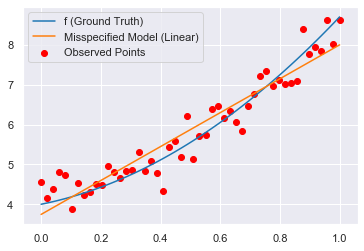

In [48]:
fig2 = plt.figure()
plt.plot(x, f, label = "f (Ground Truth)")
plt.scatter(x, y, label = "Observed Points", color = "red")
plt.plot(x, lin_func, label = "Misspecified Model (Linear)") 
plt.legend()

#### Think: the abvoe model is underfitting or overfitting?

Underfitting

### Linear regression with polynomial terms
Let's make a second guess that the data is from a second order polynomial.

In [49]:
# Construct the polynomial data matrix by adding a column of squared x values
poly_X = np.column_stack((np.ones(m), x, np.power(x,2)))

poly_X = np.asmatrix(poly_X)

# Estimate polynomial regression coefficients
poly_betas = np.linalg.inv(poly_X.T*poly_X) * poly_X.T * y.reshape(m,1)

Then we can reconstruct the polynomial function over the domain

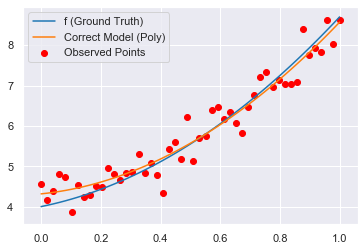

In [50]:
poly_func = poly_X * poly_betas

fig3 = plt.figure()
plt.plot(x, f, label = "f (Ground Truth)")
plt.scatter(x, y, label = "Observed Points", color = "red")
plt.plot(x, poly_func, label = "Correct Model (Poly)") 
plt.legend()

#### So this model seems to be better than the previous one.

### Optional: bias and variance decompostion of linear regresssion. The below implementation is based on the optional section of lecture 4. However, we still encourage you to run the code, to have better understanding of bias and variance decomposition.

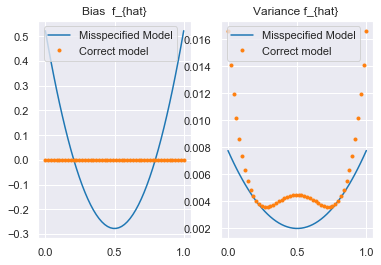

In [51]:
# Calculate bias/variance for linear regression
lin_H = X*np.linalg.inv(X.T*X)*X.T
lin_bias = np.asmatrix(f.reshape(m,1)) - lin_H * np.asmatrix(f.reshape(m,1))
lin_variance = sigma2 * np.diag(lin_H)

# Calculate bias/variance for linear regression with 2nd order polynomial
poly_H = poly_X * np.linalg.inv(poly_X.T * poly_X) * poly_X.T
poly_bias = np.asmatrix(f.reshape(m,1)) - poly_H * np.asmatrix(f.reshape(m,1))
poly_variance = sigma2 * np.diag(poly_H)

# Plot a comparison of Bias
fig3 = plt.figure()
plt.subplot(1,2,1)
plt.plot(x, lin_bias, '-', label='Misspecified Model')
plt.plot(x, poly_bias, '.', label='Correct model')
plt.title('Bias  f_{hat}')
plt.legend(frameon=True, loc=2)

# Plot a comparison of Variance
plt.subplot(1,2,2)
plt.plot(x, lin_variance, '-', label='Misspecified Model')
plt.plot( x, poly_variance,'.', label='Correct model')
plt.title('Variance f_{hat} ')
plt.legend(frameon=True,loc = 2)

## Bias vs Variance

Now let's compare the bias and variance for the linear and polynomial models. Note in this example we essentially have a series of new test points, e.g. $x$ as below, to better visulise the bias and variance with line chart.

You should notice that:
- The Bias for a correctly specified model is relatively constant and **close to 0**, compared to the under specified (missspecified, linear) model which has high bias (either negative or positive).
- The variance for a underfitting model (linear) will be lower, as in the 2nd plot.

In [52]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])